In [31]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [32]:
# Importing the data set
data = pd.read_csv("loan_train.csv")
y = data['Status']
X = data.drop(['Status'], axis=1)

In [33]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape) 

(491, 11) (123, 11) (491,) (123,)


In [34]:
# Data Imputation for categorical variables
X_train['Gender'].fillna(X_train['Gender'].mode()[0],inplace = True)
X_train['Married'].fillna(X_train['Married'].mode()[0],inplace = True)
X_train['Dependents'].fillna(X_train['Dependents'].mode()[0],inplace = True)
X_train['Self_Employed'].fillna(X_train['Self_Employed'].mode()[0],inplace = True)
X_train['Credit_History'].fillna(X_train['Credit_History'].mode()[0],inplace = True)
X_train['Term'].fillna(X_train['Term'].mode()[0],inplace = True)
# for test set as well
X_test['Gender'].fillna(X_test['Gender'].mode()[0],inplace = True)
X_test['Married'].fillna(X_test['Married'].mode()[0],inplace = True)
X_test['Dependents'].fillna(X_test['Dependents'].mode()[0],inplace = True)
X_test['Self_Employed'].fillna(X_test['Self_Employed'].mode()[0],inplace = True)
X_test['Credit_History'].fillna(X_test['Credit_History'].mode()[0],inplace = True)
X_test['Term'].fillna(X_test['Term'].mode()[0],inplace = True)

In [35]:
#Data Imputation for numerical variables
X_train['Loan_Amount'].fillna(X_train['Loan_Amount'].mean(),inplace = True)
X_test['Loan_Amount'].fillna(X_test['Loan_Amount'].mean(),inplace = True)

In [36]:
#One-hot Encoding train values
X_train = pd.get_dummies(X_train)
y_train = pd.get_dummies(y_train)
# Drop columns
X_train = X_train.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No'], axis = 1)
y_train = y_train.drop(['N'],axis = 1)
# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed'}
new1 = {'Y' : 'Loan_Status'}       
X_train.rename(columns = new, inplace = True)
y_train.rename(columns = new, inplace = True)

In [37]:
#One-hot Encoding test values
X_test = pd.get_dummies(X_test)
y_test = pd.get_dummies(y_test)
# Drop columns
X_test = X_test.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No'], axis = 1)
y_test = y_test.drop(['N'],axis = 1)
# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed'}
new1 = {'Y' : 'Loan_Status'}       
X_test.rename(columns = new, inplace = True)
y_test.rename(columns = new1, inplace = True)

In [38]:
# Data Normalisation 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
# converting to numpy one dimentional array
y_test = pd.DataFrame(y_test).to_numpy()
y_test = y_test.ravel()
y_train = pd.DataFrame(y_train).to_numpy()
y_train =  y_train.ravel()

In [40]:
#Logistic Regression
lr = LogisticRegression(solver = 'saga', max_iter = 500, random_state = 1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

[[18 25]
 [ 1 79]]
LR accuracy: 78.86%


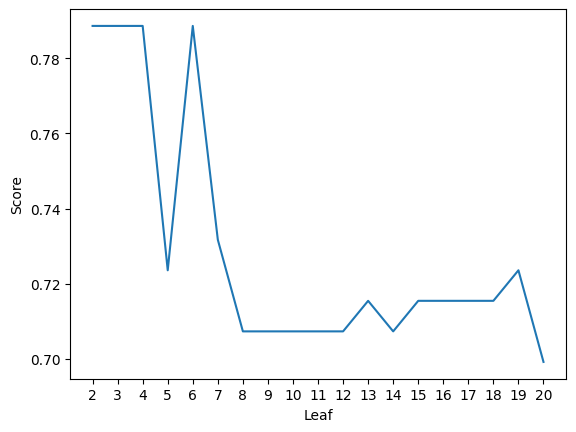

Decision Tree Accuracy: 78.86%


In [41]:
#Decision Tree
score_dt = []
for i in range(2,21):
    dtc = DecisionTreeClassifier(max_leaf_nodes = i)
    dtc.fit(X_train, y_train)
    score_dt.append(dtc.score(X_test, y_test))
    
plt.plot(range(2,21), score_dt)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(score_dt)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

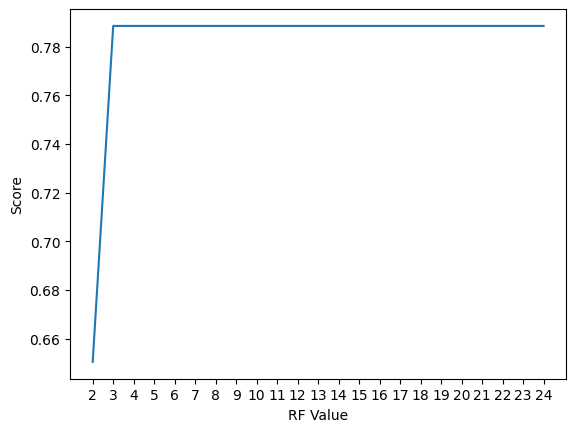

Random Forest Accuracy:  78.86%


In [42]:
#Random Forest
score_rf = []
for i in range(2,25):
    rfc = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    rfc.fit(X_train, y_train)
    score_rf.append(rfc.score(X_test, y_test))
    
plt.plot(range(2,25), score_rf)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(score_rf)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

In [43]:
#Gradient Boosting
paramsGB={'n_estimators' : [100,200,300,400,500],
      'max_depth' : [1,2,3,4,5],
      'subsample' : [0.5,1],
      'max_leaf_nodes' : [2,5,10,20,30,40,50]}
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(X_train, y_train)
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)


GradientBoostingClassifier(max_depth=4, max_leaf_nodes=2, n_estimators=200,
                           subsample=0.5)
0.8245000000000001
{'subsample': 0.5, 'n_estimators': 200, 'max_leaf_nodes': 2, 'max_depth': 4}
6


In [45]:
gbc = GradientBoostingClassifier(subsample = 0.5, n_estimators = 400, max_depth = 4, max_leaf_nodes = 10)
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.74      0.47      0.57        43
           1       0.76      0.91      0.83        80

    accuracy                           0.76       123
   macro avg       0.75      0.69      0.70       123
weighted avg       0.75      0.76      0.74       123

[[20 23]
 [ 7 73]]
Gradient Boosting accuracy: 75.61%
